**Exploring a Pixar Movie Dataset**

In this project, I will explore a dataset containing information on the 27 Pixar movies, including critics' ratings, revenue figures, production costs, Oscar results, and more. Using recently learned plotting techniques from Pandas, Seaborn, and Matplotlib, I will analyze trends, visualize key insights, and uncover patterns within the data.

Firstly, we load the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

pixar_movies = pd.read_csv('PixarMovies.csv')
pixar_movies

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


**DATA CLEANING**

The dataset is missing values for the Oscars Nominated and Oscars Won columns in the last row, which corresponds to the movie Inside Out. This results in errors when performing calculations on these columns. To address this, I create a new DataFrame that excludes Inside Out.

Additionally, the Domestic % and International % columns are stored as objects (strings), so I convert them into floats for accurate numerical analysis.

Lastly, I normalize the IMDB score to a 100-point scale and introduce a new Average Score, calculated as the mean of the Rotten Tomatoes (RT) score, the normalized IMDB score, and the Metacritic score. This metric will be useful for further analysis.

In [3]:
print(pixar_movies.shape)

print(pixar_movies.dtypes)

pixar_movies.describe()

(15, 16)
Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object


,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,1.000000,0.000000
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,3.000000,1.000000
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,4.750000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


In [4]:
pixar_movies['Domestic %'] = pixar_movies['Domestic %'].str.rstrip('%').astype(float)
pixar_movies['International %'] = pixar_movies['International %'].str.rstrip('%').astype(float)

In [5]:
pixar_movies['IMDB Score'] = pixar_movies['IMDB Score'] * 10
pixar_movies['Average Score'] = pixar_movies[['IMDB Score', 'RT Score', 'Metacritic Score']].mean(axis=1)
pixar_movies
filtered_pixar = pixar_movies.dropna()
filtered_pixar.set_index('Movie', inplace=True)
filtered_pixar

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won,Average Score
Movie,,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0,91.666667
A Bug's Life,1998,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0,80.333333
Toy Story 2,1999,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0,89.000000
"Monsters, Inc.",2001,90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0,85.000000
Finding Nemo,2003,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0,90.333333
The Incredibles,2004,115,97,80.0,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4.0,2.0,89.000000
Cars,2006,116,74,72.0,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2.0,0.0,73.000000
Ratatouille,2007,111,96,80.0,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5.0,1.0,90.666667
WALL-E,2008,97,96,84.0,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6.0,1.0,91.333333


**VISUALS**

The following line chart visualizes how each movie performed across three major review sites: Rotten Tomatoes (RT), IMDB, and Metacritic. A key takeaway from this comparison is that Cars 2 received the lowest ratings across all three platforms.

Additionally, a noticeable trend emerges—Rotten Tomatoes (RT) generally assigns higher ratings compared to the other two sites, indicating a more favorable review pattern.

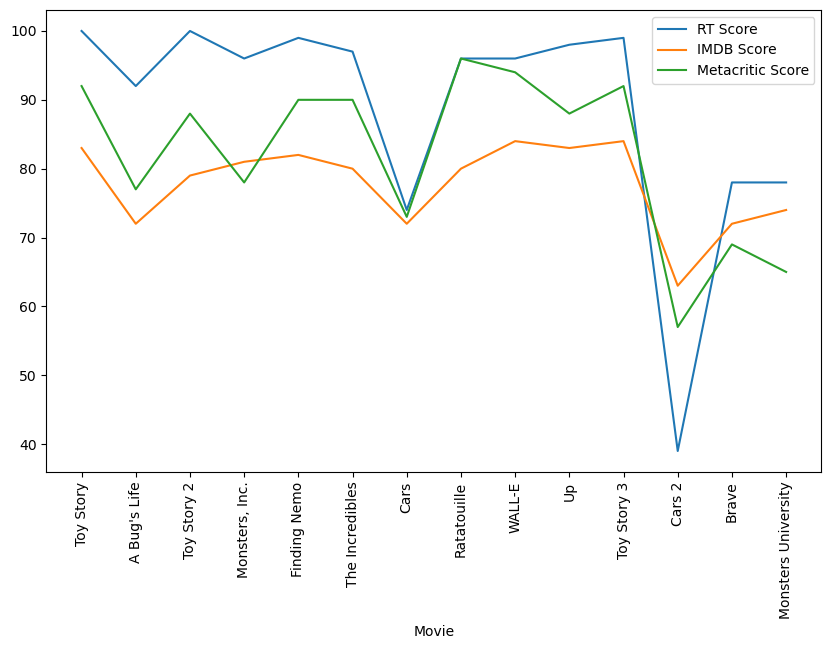

In [6]:
critics_reviews = filtered_pixar[['RT Score', 'IMDB Score', 'Metacritic Score']]
critics_reviews.plot(figsize=(10,6), label=critics_reviews.index)
plt.xticks(np.arange(14),critics_reviews.index, rotation='vertical')
plt.show()

The box plot below reinforces our hypothesis that Rotten Tomatoes consistently gives higher ratings compared to the other two review sites.

Additionally, we observe that Metacritic ratings exhibit a wider spread, ranging from just under 60 to nearly 100. This suggests that Metacritic scores for Pixar movies tend to vary more significantly than those from Rotten Tomatoes or IMDB.

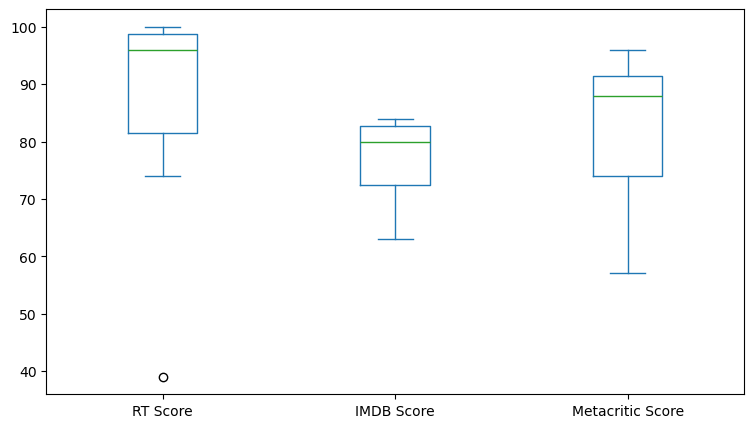

In [7]:
critics_reviews.plot(figsize=(9,5), kind='box')
plt.show()

The stacked bar plot below shows there's been a general decrease in the proportion of revenue that was made domestically.

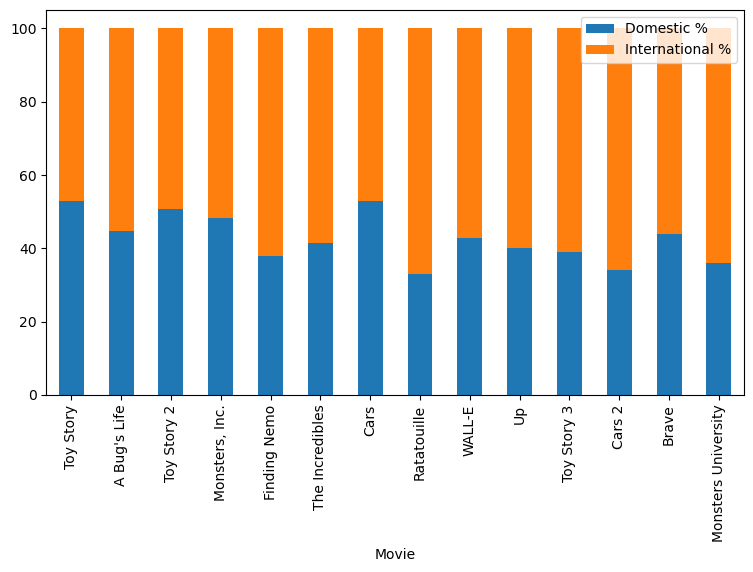

In [8]:
revenue_proportions = filtered_pixar[['Domestic %', 'International %']]
revenue_proportions.plot(figsize=(9,5), kind='bar', stacked=True)
plt.show()

The grouped bar plot below shows the Oscar Nominations and Oscars Won for each movie. A few of the movies won 2 Oscars, and Wall-E was the most nominated film of the bunch.

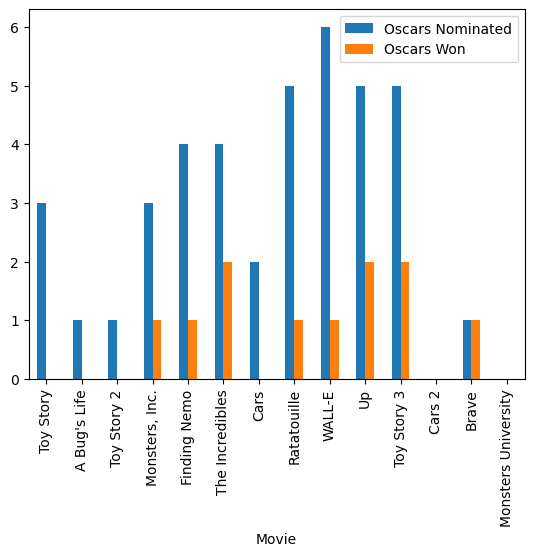

In [9]:
oscars = filtered_pixar[['Oscars Nominated', 'Oscars Won']]
oscars.plot.bar()
plt.show()

To explore potential relationships between Adjusted Domestic Gross, Production Budget, and Average Score, I created the pair plot below.

A pair plot generates scatter plots for every combination of the selected variables, while the diagonal displays histograms for each individual variable.

From the results, we can observe a positive trend in the top-right scatter plot, suggesting that movies with higher ratings tend to have a higher domestic gross. This indicates that better-reviewed Pixar films generally perform better at the box office.

AttributeError: module 'seaborn' has no attribute 'plt'

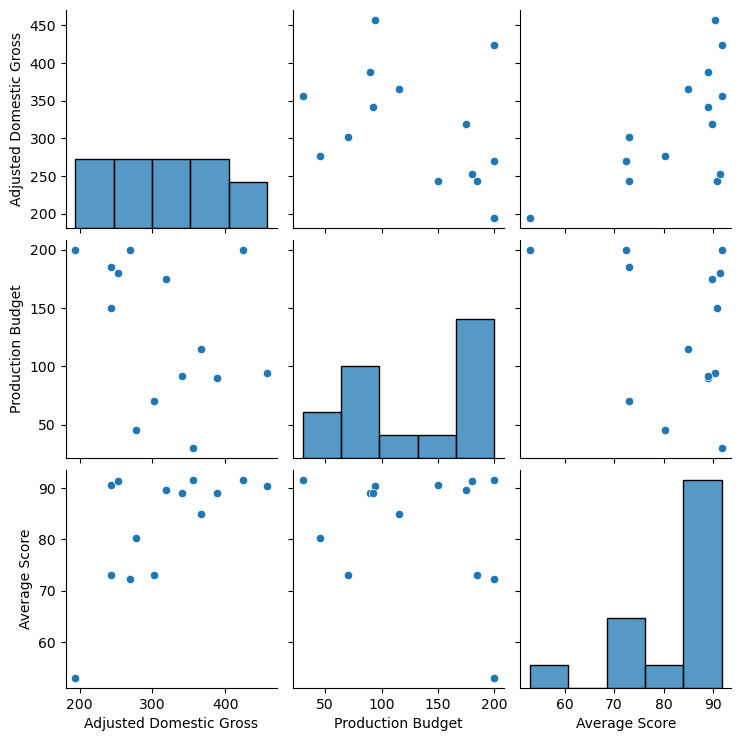

In [10]:
sns.pairplot(filtered_pixar[['Adjusted Domestic Gross','Production Budget','Average Score']])
sns.plt.show()

**CONCLUSION**

Creating charts with Pandas and Matplotlib was quick and allowed me to draw various inferences depending on which chart type was selected. Seaborn made the charts more visually appealing than with the default matplot